# PRÁTICA GUIADA: Regressão Linear com scikit-Learn e statsmodels

#### Vamos investigar o dataset imobiliário usando regressão linear. Vamos usar duas bibliotecas (ou pacotes) diferentes, com exemplos que podem ser encontrados na documentação oficial.

- [Doc statsmodels: regressão linear](http://statsmodels.sourceforge.net/devel/examples/#regression)
- [Doc scikit-learn: regressão linear](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## 1. Introdução

#### Já tivemos contato e nos familiarizamos com a biblioteca scikit-learn. Para esse notebook precisaremos baixar as seguintes classes de funções:

- [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html)

- [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

- [`sklearn.datasets`](https://scikit-learn.org/stable/datasets/index.html)

- [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/linear_model.html)

- [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

- [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### Lembrando que devemos ativar a função mágica [`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 

In [89]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
-->

#### A biblioteca também inclui alguns [datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html), dentre eles vamos trabalhar com o `boston house-prices`, que pode ser carregado com o método  [`datasets.load_boston()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston).

In [91]:
data = datasets.load_boston()
print (data.DESCR)
#data = datasets.load_boston(return_X_y = True)
#print (data)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
#data.data

####  <span style = "color:red">Código Original.</span>
<!---
data = datasets.load_boston()
print (data.DESCR)
#data = datasets.load_boston(return_X_y = True)
#print (data)
-->

## 2. Conhecendo o formato dos datsets de scikit-learn

#### Observe o tipo associado ao dataset `data`, você perceberá que ele é um [`sklearn.utils.Bunch`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html). Esse objeto funciona como um container que expõe chaves como atributos. Eles são às vezes são usados como saída para funções e métodos. Os objetos do tipo `bunch`  estendem os dicionários, permitindo que os valores sejam acessados por chave, `bunch ["value_key"]` ou por um atributo, `bunch.valor_key`.

In [92]:
type(data)

sklearn.utils.Bunch

####  <span style = "color:red">Código Original.</span>
<!---
type(data)
-->

#### Vamos imprimir os nomes das features com a ajuda do atributo [`feature_names`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston), podemos ainda realizar a observação do conjunto de valores das variáveis dependentes e independente associados a um determinado índice, por exemplo zero, com as funções [`.data[]`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) e [`target[]`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston).


In [101]:
print(data.feature_names)
#print(data.target)
#print(data.data)
#print(data.data[0])
#print(data.target[0])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


####  <span style = "color:red">Código Original.</span>
<!---
#print (data.feature_names)
#print (data.data[0])
print (data.target[0])
-->

#### Como podem ver, a Scikit-learn já separou o preço das casas do resto das variáveis.

## 3. Estimando o modelo de regressão linear

#### Primeiro, colocamos os dados em um `dataframe` e verificamos se tudo foi carregado corretamente.

#### Para isso vamos usar as bibliotecas [`numpy`](https://numpy.org/) e [`pandas`](https://pandas.pydata.org/) para realizarmos o tratamento dos dados. Vamos precisar também aplciar o método  [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) para converter os objetos que recebem os dados `data` e os objetivos `targets` em em `dataframes` homônimos. Para o primeiro vamos observar os parâmetros `columns = data.feature_names` e para o segundo, `columns = ["MEDV"]`, para a coluna alvo que queremos determinar.

In [105]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, 
                  columns = data.feature_names
                 )

# Colocamos o target (preço das casas -- MEDV) em outro DataFrame
targets = pd.DataFrame(data.target, 
                       columns = ["MEDV"]
                      )

# Vemos as primeiras filas de dados
df.head()
#targets.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
#df.head()
#targets.head()

####  <span style = "color:red">Código Original.</span>
<!---
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)

# Colocamos o target (preço das casas -- MEDV) em outro DataFrame
targets = pd.DataFrame(data.target, columns = ["MEDV"])

# Vemos as primeiras filas de dados
print (df.head())
print (targets.head())
-->

- Identificamos visualmente algumas variáveis que pareçam relacionadas com o preço, RM e LSTAT. 

- Vamos analisá-las separadamente e, depois, juntas.

#### Vamos gerar as matrizes `X = df[["RM"]]`  e o target `y = targets["MEDV"]`.

In [106]:
# Geramos as matrizes e o target
X = df[["RM"]]
y = targets["MEDV"]

####  <span style = "color:red">Código Original.</span>
<!---
# Geramos as matrizes e o target
X = df[["RM"]]
y = targets["MEDV"]
-->

#### O próximo passo é instanciar um modelo `lm` com a ajuda da função [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

#### Depois disso podemos ajustar os pontos com o método [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) e realizar as previsões com  o método [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict).

#### Os métodos [`.intercept_`](https://scikit-learn.org/stable/modules/linear_model.html) e [`.coef_`](https://scikit-learn.org/stable/modules/linear_model.html) nos dão os valores dos coeficientes linear e angular. O método [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) retorna o coeficiente de determinação [R^2](https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/) da previsão.

In [63]:
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)
print ('R2_train=', ' ', model.score(X, y))

Intercepto=   -34.67062077643857
RM=   [9.10210898]
R2_train=   0.48352545599133423


####  <span style = "color:red">Código Original.</span>
<!---
# Instanciamos, Ajustamos, etc.
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)

print ('Intercepto=', ' ', model.intercept_)
print ('RM=', ' ', model.coef_)
print ('R2_train=', ' ', model.score(X, y))
-->

#### Para tornar o processo mais ágil, vamos criar uma função que resuma os coeficientes, o interceptor e o $R^{2}$, ela terá como argumentos as quantidades `"model"` um objeto com o modelo e `"X"`, uma matriz de variáveis independentes.

In [65]:
def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , 
                     X.columns.values
                    )
    
    a = a.append(pd.DataFrame([model.intercept_,
                               model.score(X, y)], 
                              index = ['Intecept',
                                       'R2'
                                      ]
                             )
                )
    print(a)
    return(a)

####  <span style = "color:red">Código Original.</span>
<!---
def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , 
                     X.columns.values
                    )
    
    a = a.append(pd.DataFrame([model.intercept_, 
                               model.score(X, y)], 
                              index = ['Intecept',
                                       'R2'
                                      ]
                             )
                )
    return(a)
-->

#### Podemos representar graficamente os atributos do objeto `X` , em função do alvo no objeto `y` com o método [`.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html), observe os parâmetros `s = 30,` `c = 'r'`, `marker = '+'`, `zorder = 10`. Você pode também explorar os atributos `.xlabel()`, `.ylabel()` e `.show()`.

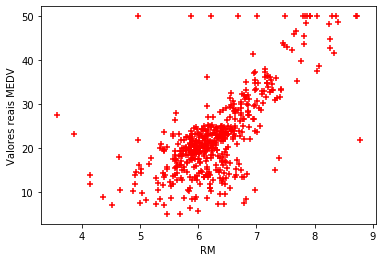

In [66]:
plt.scatter(X, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("RM")
plt.ylabel("Valores reais MEDV")
plt.show()

####  <span style = "color:red">Código Original.</span>
<!---
# Representamos graficamente a variável X contra a variável Y
plt.scatter(X, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("RM")
plt.ylabel("Valores reais MEDV")
plt.show()
-->

#### O mesmo pode ser representado para as predições `predictions`, aqui podemos plotar também uma linha (y, y) para ter uma ideia de escala e disposição dos ponteos.

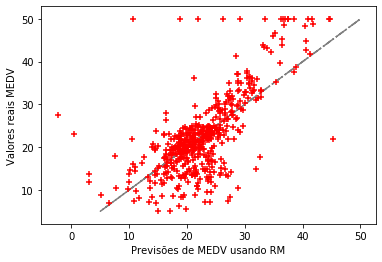

In [67]:
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )

plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões de MEDV usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

####  <span style = "color:red">Código Original.</span>
<!---
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )

plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões de MEDV usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()
-->

#### Podemos calcular o erro de nosso ajuste com o auxílio da função [`.mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) e então chamar a função que definimos `.sum_mod()` para calcular os coeficientes de ajuste e o grau de acurácia $R^{2}$.

In [68]:
print ("EMC:", mean_squared_error(y, predictions)) # erro quadrático médio
sum_mod(model, X)

EMC: 43.60055177116956
                  0
RM         9.102109
Intecept -34.670621
R2         0.483525


,0
RM,9.102109
Intecept,-34.670621
R2,0.483525


####  <span style = "color:red">Código Original.</span>
<!---
print ("EMC:", mean_squared_error(y, predictions)) # erro quadrático médio
sum_mod(model, X)
-->

- O que podem dizer ao comparar os dois gráficos? Como interpretam o último gráfico ? O que ele diz sobre o modelo? O que podem dizer sobre a relação entre RM e MEDV?

- O que podem dizer ao comparar este modelo com o anterior? 

#### A seguir vamos plotar nossa predição `predictions` em comparação com os valores reais `y`, mas agora considerando os atributos `'LSTAT'` e `'MEDV'`. 

#### Vamos instanciar um modelo de regressão `lm` 
linear_model.LinearRegression
[`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), da biblioteca [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

#### Arranjos de atributos e targets devem ser criados para que o modelo possa ser submetido ao ajuste `.fit()` e à previsão `.predict()` dos rótulos.

#### Por fim as funções `plot()` e `.scatter()` são usadas para a impressão do gráfico. Vamos também imprimir o erro quadrático médio `mean_squared_error()` entre as previões e as observações.

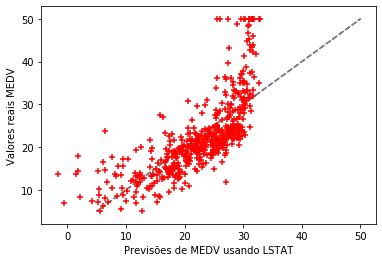

EMC: 38.48296722989414
                  0
LSTAT     -0.950049
Intecept  34.553841
R2         0.544146


In [69]:
lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Representamos graficamente o modelo
plt.plot(y, 
         y, 
         '--', 
         c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões de MEDV usando LSTAT")
plt.ylabel("Valores reais MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
sum_mod(model, X)
prevMSE = mean_squared_error(y, predictions)

####  <span style = "color:red">Código Original.</span>
<!---
lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Representamos graficamente o modelo
plt.plot(y, 
         y, 
         '--', 
         c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões de MEDV usando LSTAT")
plt.ylabel("Valores reais MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
sum_mod(model, X)
-->

- O que pode ser dito sobre o a relação ("LSTAT", "MEDV").

#### Avaliamos as influências dos atributos  `'RM'` e `'LSTAT'` sobre o valor médio das casas ocupadas pelos próprios donos `'MEDV'` separadamente, vamos agora gerar um modelo que tome as duas variáveis ao mesmo tempo.

#### Repetimos o processo de instanciamento de um modelo, separamos o `dataset` original em atributos e `target`, ajustamos os pontos e realizamos as previsões.

#### Quando plotarmos as previsões de `'MEDV'` usando `'RM'` e `'LSTAT'` e calcularmos o erro quadrático médio (EQM), poderemos comparar os três modelos e discutir aquele que melhor ajusta os pontos. 

####  <span style = "color:red">Código Original.</span>
<!---
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.plot(y,
        y, 
        '-.',
        c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30 , 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões de MEDV usando RM e LSTAT")
plt.ylabel("Valores reais MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)
-->

## Comparando os modelos

#### Um modelo perfeito pareceria uma linha reta a 45 graus como a que vemos em cinza.

### Exercício

#### Construa um modelo que leve em conta todos os atributos, investigue a dispersão `(predictions, y)`.

In [70]:
df.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

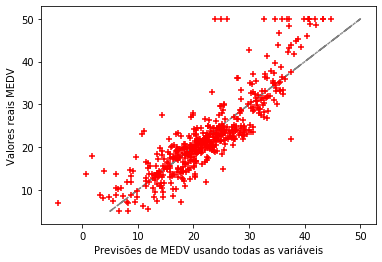

EMC: 21.894831181729202
Melhoria:  True
                  0
CRIM      -0.108011
ZN         0.046420
INDUS      0.020559
CHAS       2.686734
NOX      -17.766611
RM         3.809865
AGE        0.000692
DIS       -1.475567
RAD        0.306049
TAX       -0.012335
PTRATIO   -0.952747
B          0.009312
LSTAT     -0.524758
Intecept  36.459488
R2         0.740643
                  0
CRIM      -0.108011
ZN         0.046420
INDUS      0.020559
CHAS       2.686734
NOX      -17.766611
RM         3.809865
AGE        0.000692
DIS       -1.475567
RAD        0.306049
TAX       -0.012335
PTRATIO   -0.952747
B          0.009312
LSTAT     -0.524758
Intecept  36.459488
R2         0.740643


In [71]:
lm = linear_model.LinearRegression()

#X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
X = df[list(df.columns.values)]
#X = df[['RM', 'LSTAT']]

y = targets['MEDV']

model = lm.fit(X, y)
predictions = model.predict(X)

plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões de MEDV usando todas as variáveis")
plt.ylabel("Valores reais MEDV")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
print ("Melhoria: ", mean_squared_error(y, predictions) < prevMSE)

print (sum_mod(model, X))

####  <span style = "color:red">Código Original.</span>
<!---
-->

## Introdução a Statsmodels

#### Agora vejamos como usar a biblioteca [`statsmodels.api`](https://www.statsmodels.org/stable/index.html), também popular para realizar regressões. O statsmodel é um módulo Python que oferece diversas classes e funções para a estimação de modelos estatísticos.


#### A diferença aqui ocorre quando vamos ajustar o modelo, isso deve ser feito juntamente com a função  [`statsmodels.api.OLS`](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html), que usa o método [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares), uma forma de escolher o melhor modelo através dos parâmetros que geram os mínimos quadrados ([Least squares](https://en.wikipedia.org/wiki/Least_squares)).

#### As demais funções que vimos até o momento permanecem na construção:

- `.fit()`; 
- `.predict()`;
- `.plot()`;
- `.scatter()`;
- `mean_squared_error`.

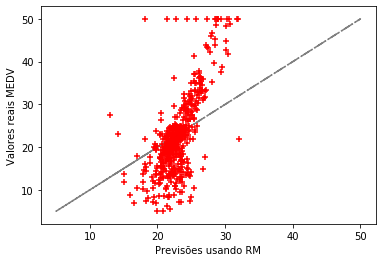

EMC: 58.41063543210173
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                   3.74e-256
Time:                        18:41:16   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [75]:
import statsmodels.api as sm

X = df[["RM"]]
y = targets[["MEDV"]]

# Notar a diferença na ordem de X e y neste caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

###  <span style = "color:red">Código Original.</span>
<!---
import statsmodels.api as sm

X = df[["RM"]]
y = targets[["MEDV"]]

# Notar a diferença na ordem de X e y neste caso
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())
-->

#### Vamos redefinir o objeto `X` em `statsmodels` com a expressão  `X = sm.add_constant(X) `.

#### A função [`statsmodels.tools.tools.add_constant()`](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html) acresenta uma coluna de uns ao arranjo pois o coeficiente linear `interecept` não está incluído por padrão no `statsmodels` e deve ser adicionado pelo usuário.

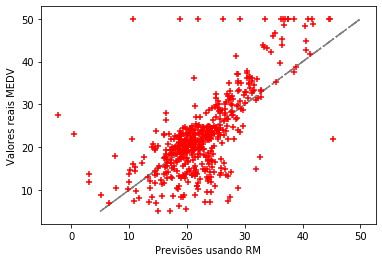

EMC: 43.60055177116956
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           2.49e-74
Time:                        18:41:34   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.

In [76]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

###  <span style = "color:red">Código Original.</span>
<!---
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())
-->

#### Para terminar, vamos usar todas os atributos como preditores para realizar a previsão do nosso target.

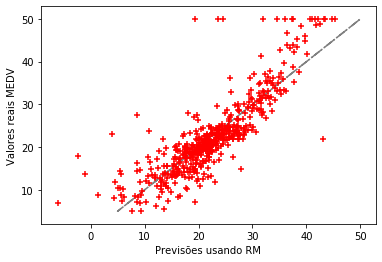

EMC: 24.166099330126492
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                        0.00
Time:                        18:42:05   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [78]:
X = sm.add_constant(X)
X = df[list(df.columns.values)]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

###  <span style = "color:red">Código Original.</span>
<!---
X = sm.add_constant(X)
X = df[list(df.columns.values)]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Representamos graficamente os resultados
plt.plot(y, 
         y, 
         '-.', 
         c = 'grey'
        )
plt.scatter(predictions, 
            y, 
            s = 30, 
            c = 'r', 
            marker = '+', 
            zorder = 10
           )
plt.xlabel("Previsões usando RM")
plt.ylabel("Valores reais MEDV")
plt.show()

# Imprimimos o MSE e um resumo do modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())
-->

#### O método [`.summary()`](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) é muito poderoso para descrever o ajuste do modelo aos dados, tanto que torna o `statomodel` uma biblioteca preferível para esse ponto. Vamos a seguir discutir alguns dos principais pontos do sumário apresentado pelo método acima.

- [Hipótese nula](https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/) $H_{0}$: Não há relação entre as variáveis preditoras e a variável target: 
    ($y_{H_{0}} = a_{0}$)
- [Hipótese alternativa](https://www.statisticshowto.com/what-is-an-alternate-hypothesis/) $H_{1}$: Há relação entre as variáveis preditoras e a variável target: 
    ($y_{H_{1}} = a_{0} + b_{1}x_{1} + ... + b_{n}x_{n}$).

    1. <b>R-square</b>: Proporsão de variância da variável dependente predita pelas variáveis independentes, fit perfeito (= 1), 

    2. <b>Adj. R-squared</b>: Penaliza modelos com atributos desnecessários. Valores R-square = Adj. R-squared indicam que não há atributos desnecessários no modelo.

    3. <b>F-statistic </b>: Avalia a significância do modelo de modo geral, Em regs. múltiplas ele compara o modelo sem preditores ($y_{H_{0}}$) com o modelo especificado ($y_{H_{1}}$) diz que os modelos são iguais, $H_{1}$ diz que $y_{H_{0}}$ é pior. Valores altos indicam rejeição de $H_{0}$.

    4. <b>Prob (F-statistic) </b>: Probabilidade de obter resultados de testes pelo menos tão extremos quanto os resultados realmente observados, assumindo que a hipótese nula esteja correta. Valores baixos ($p-value < 0.05$) indicam rejeição de $H_{0}$. 
    
    5. <b> Log_likelihood </b>: testa a semelhança dos estimadores com os coeficientes reais através da comparação entre o modelo com os coeficientes calculados e um modelo com o Beta igual a zero. Para que o modelo se demontre semelhante, devemos ter um resultado negativo. Para mais informações acesse [Likelihood Ratio Test for Linear Regression](https://math.stackexchange.com/questions/123750/likelihood-ratio-test-for-linear-regression). 
    
    6. <b>AIC</b>: teste de AKAIKE para verificar a divergência entre o modelo ajustado e o modelo "real". Quanto menor for seu valor, melhor é o ajuste matemático para minimização dos erros quadráticos. Para um bom ajuste, o resultado deve ser um número bem próximo a zero. Para mais informações [Critérios para seleção de modelos baseados na razão de verossimilhança](http://arquivo.ufv.br/dbg/resumos2008b/Resumo%20Claudomiro.htm)

    7. <b>BIC</b>: Critério de informação Bayesiano onde o critério é definido como a estatística que maximiza a probabilidade de se identificar o verdadeiro modelo dentre os estimadores avaliados. Quanto menor for seu valor, melhor é o ajuste matemático para minimização dos erros quadráticos. Para mais informações [Critérios para seleção de modelos baseados na razão de verossimilhança](http://arquivo.ufv.br/dbg/resumos2008b/Resumo%20Claudomiro.htm). 
    
    8. <b>t</b> : Teste (t-test) para inferir se um determinado atributo é significante ou relevante para um determinado target. Considera a relação entre um determinado atributo e o target, sem levar em conta as influências dos demais atributos. Um atributo por vez. Valores altos indicam rejeição de $H_{0}$.
    
    9. <b>P>|t|</b>: P-value associado ao respectivo t (t-test). Valores baixos ($p-value < 0.05$) indicam rejeição de $H_{0}$.
    
    10. <b>Omnibus</b>: Testa se a variação explicada em um conjunto de dados é significativamente maior do que a variação inexplicada. Seu teste de probabilidade deve tender a zero (distribuição normal dos erros). Para ler mais sobre este teste acesse [Omnibus test](https://en.wikipedia.org/wiki/Omnibus_test).
    
    11. <b>Durbin-Watson (Endogeneidade)</b>: A estatística Durbin Watson (DW) é um teste de autocorrelação nos resíduos de uma análise de regressão estatística. A estatística Durbin-Watson sempre terá um valor entre 0 e 4. Um valor de 2,0 significa que não há autocorrelação detectada na amostra. Valores de 0 a menos de 2 indicam autocorrelação positiva e valores de 2 a 4 indicam autocorrelação negativa - serve para verificar a endogeneidade. Dessa forma, o valor esperado para o teste Durbin-Watson deve estar próximo de 2 para indicar erros aleatórios independentes. Para mais informações acesse [Durbin Watson Statistic Definition](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp). 
    
    12. <b>Jarque-Bera (Distribuição-Normal dos Erros)</b>: teste para determinar se os dados da amostra têm assimetria e curtose correspondentes a uma distribuição normal. O teste recebeu o nome de Carlos Jarque e Anil K. Bera. A estatística do teste é sempre não-negativa. Se estiver longe de zero, sinaliza que os dados não têm uma distribuição normal. Ainda, seu teste de probabilidade deve tender a zero (distribuição normal dos erros). Para mais informações acesse [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)    

##  <span style = "color:blue">Prática Independente.</span>

#### Considere o dataset `demografia.csv` sobre dados demográficosdo IBGE e explore os dados primeiramente. Capte as variáveis dummies com a função [`get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 

#### Considere todas as features para a regressão linear múltima, observando a biblioteca [`statsmodels.api`](https://www.statsmodels.org/stable/index.html), e discuta o relatório gerado pela aplicação do método [`.summary()`](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html).

In [79]:
IBGE = pd.read_csv("demografia.csv")
IBGE.head()

,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


In [80]:
IBGE2 = pd.get_dummies(IBGE, drop_first = True)
IBGE2.head()

,seq,id,idade,anos_estudo,salario,estado_civil,sexo_homem,sexo_mulher,cor/raca_Branca,cor/raca_Indigena,cor/raca_Parda,cor/raca_Preta,regiao_nordeste,regiao_norte,regiao_sudeste,regiao_sul
0,0,1.100190e+10,53,5.0,63600.000000,1.0,1,0,0,0,1,0,0,1,0,0
1,1,1.100190e+10,49,8.0,NaN,1.0,0,1,0,0,0,0,0,1,0,0
2,2,1.100190e+10,22,11.0,4352.400391,0.0,0,1,0,1,0,0,1,0,0,0
3,3,1.100190e+10,55,15.0,96600.000000,1.0,1,0,0,0,0,0,0,1,0,0
4,4,1.100190e+10,56,15.0,157800.000000,1.0,0,1,0,0,0,0,0,1,0,0


In [81]:
feature_cols = ['idade', 
                'anos_estudo', 
                'estado_civil', 
                'sexo_homem', 
                'sexo_mulher', 
                'cor/raca_Branca',
                'cor/raca_Indigena',
                'cor/raca_Parda',
                'cor/raca_Preta',
                'regiao_nordeste',
                'regiao_norte',
                'regiao_sudeste',
                'regiao_sul'
               ]

In [82]:
IBGE2.dropna(subset = ['salario'], 
             inplace = True
            )
IBGE2.dropna(subset = feature_cols, 
             inplace = True
            )

In [83]:
X = IBGE2[feature_cols]
y = IBGE2['salario']

In [84]:
X = IBGE2[feature_cols]
X = sm.add_constant(X)

linreg = sm.OLS(y, X).fit()
yhat = linreg.predict(X)

print ("EMC:", mean_squared_error(IBGE2['salario'], 
                                  yhat
                                 )
      )
print (linreg.summary())

EMC: 7632578719.732509
                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     132.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:42:22   Log-Likelihood:            -6.0833e+05
No. Observations:               47538   AIC:                         1.217e+06
Df Residuals:                   47524   BIC:                         1.217e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const          

#### Agora considere a avaliação do sumário anterior e proponha alterações ao conjunto de atributos descritivos inicial, para que seja possível obter uma avaliação melhorada da regressão.

In [85]:
feature_cols = ['idade', 
                'anos_estudo',
                'regiao_norte'
               ]

In [86]:
IBGE2.dropna(subset = ['salario'], inplace = True)
IBGE2.dropna(subset = feature_cols, inplace = True)

In [87]:
X = IBGE2[feature_cols]
y = IBGE2['salario']

In [88]:
X = IBGE2[feature_cols]
X = sm.add_constant(X)

linreg = sm.OLS(y, X).fit()
yhat = linreg.predict(X)

print ("EMC:", mean_squared_error(IBGE2['salario'], yhat))
print (linreg.summary())

EMC: 7658561039.358665
                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     519.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:42:36   Log-Likelihood:            -6.0841e+05
No. Observations:               47538   AIC:                         1.217e+06
Df Residuals:                   47534   BIC:                         1.217e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.509e+04  

####  <span style = "color:blue">Código Original.</span>
<!---
[``]()
-->